# Thresholding

Thresholding é um dos métodos mais simples de segmentação de imagens no processamento de imagens digitais. A partir de uma imagem em tons de cinza, o thresholding pode ser usada para criar imagens binárias.

Os métodos de thresholding mais simples substituem cada pixel em uma imagem por um pixel preto se a intensidade da imagem for menor que um valor fixo chamado threshold, ou por um pixel branco se a intensidade do pixel for maior que esse threshold. No exemplo abaixo, essa ação resulta na árvore escura se tornando completamente preta e a neve brilhante se tornando completamente branca.

**Imagem original:**

![Imagem original](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/Pavlovsk_Railing_of_bridge_Yellow_palace_Winter.jpg/500px-Pavlovsk_Railing_of_bridge_Yellow_palace_Winter.jpg)

**Imagem binarizada após thresholding:**

![Imagem após thresholding](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Pavlovsk_Railing_of_bridge_Yellow_palace_Winter_bw_threshold.jpg/500px-Pavlovsk_Railing_of_bridge_Yellow_palace_Winter_bw_threshold.jpg)

## Limitações e Considerações

O thresholding funcionará melhor sob certas condições:

- baixo nível de ruído
- maior variância intraclasse do que interclasse
- iluminação homogênea, etc.

Em casos difíceis, o thresholding provavelmente será imperfeito e resultará em uma imagem binária com falsos positivos e falsos negativos.

## Thresholding com OpenCV

#### <font style="color:rgb(34,139,34)">Threshold</font>

A função [**`cv.threshold()`**](https://docs.opencv.org/4.7.0/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57) aplica um limiar fixo a cada elemento de um array. Ela é comumente usada para converter uma imagem em escala de cinza para uma imagem binária ou para remoção de ruído — isto é, filtrar pixels com valores muito pequenos ou muito grandes. A função suporta diversos tipos de limiarização, determinados pelo parâmetro `type`.

### <font style="color:rgb(8,133,37)">Sintaxe da Função</font>

```python
retval, dst = cv.threshold(src, thresh, maxval, type[, dst])
```

**Parâmetros**

- **`src`** -	Array de entrada (múltiplos canais, 8 bits ou ponto flutuante de 32 bits).
- **`thresh`** - Valor de limiar.
- **`maxval`** - Valor máximo a ser usado com os tipos `THRESH_BINARY` e `THRESH_BINARY_INV`.
- **`type`** - Tipo de limiarização (consulte `ThresholdTypes`).


## Simple Thresholding

Neste caso, a abordagem é direta. Para cada pixel, o mesmo valor de limiar é aplicado. Se o valor do pixel for menor que o limiar, ele é definido como 0, caso contrário, é definido como um valor máximo. A função `cv.threshold` é usada para aplicar o thresholding. O primeiro argumento é a imagem de origem, que deve ser uma imagem em escala de cinza. O segundo argumento é o valor de threshold, que é usado para classificar os valores dos pixels. O terceiro argumento é o valor máximo que é atribuído aos valores dos pixels que excedem o threshold. O OpenCV fornece diferentes tipos de thresholding, que são dados pelo quarto parâmetro da função. O thresholding básico é feito usando o tipo `cv.THRESH_BINARY`. Todos os tipos de thresholding simples são:

- cv.THRESH_BINARY
- cv.THRESH_BINARY_INV
- cv.THRESH_TRUNC
- cv.THRESH_TOZERO
- cv.THRESH_TOZERO_INV

<img src="https://www.bogotobogo.com/python/OpenCV_Python/images/thresholding/thrshold_params.png">

Consulte a documentação dos tipos para as diferenças.

O método retorna dois resultados. O primeiro é o threshold que foi usado e o segundo resultado é a imagem thresholded.

Este código compara os diferentes tipos de thresholding simples:

In [6]:
# Baixar as imagens que serão usadas no notebook
!wget https://raw.githubusercontent.com/carlosfab/visao-computacional/main/data/degrade.png
!wget https://raw.githubusercontent.com/carlosfab/visao-computacional/main/data/sudoku.png
!wget https://raw.githubusercontent.com/carlosfab/visao-computacional/main/data/brasil-moedas.jpg

--2024-07-09 18:28:16--  https://raw.githubusercontent.com/carlosfab/visao-computacional/main/data/degrade.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4275 (4.2K) [image/png]
Saving to: ‘degrade.png.1’

degrade.png.1       100%[===================>]   4.17K  --.-KB/s    in 0s      

2024-07-09 18:28:16 (23.6 MB/s) - ‘degrade.png.1’ saved [4275/4275]

--2024-07-09 18:28:16--  https://raw.githubusercontent.com/carlosfab/visao-computacional/main/data/sudoku.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250720 (245K) [im

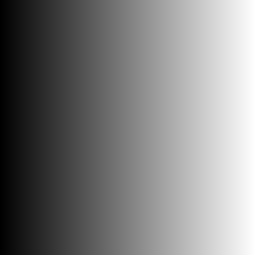

In [4]:
# Importando as bibliotecas necessárias
from google.colab.patches import cv2_imshow
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregando a imagem em escala de cinza
img = cv2.imread('degrade.png', 0)

# Plotando a imagem
cv2_imshow(img)

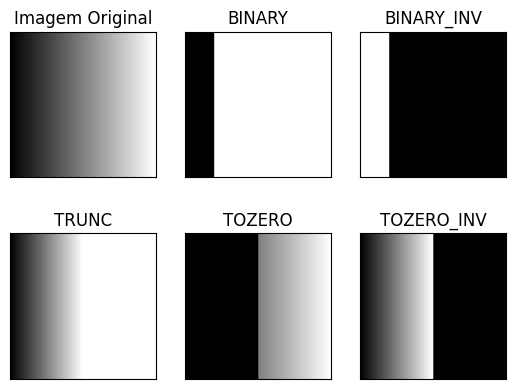

In [5]:
# Aplicando diferentes tipos de thresholding na imagem
# cv.THRESH_BINARY: Todos os pixels com intensidade maior que o limiar são convertidos para o valor máximo (255).
# Os demais pixels são convertidos para 0
ret, thresh1 = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)

# cv.THRESH_BINARY_INV: Inverso do cv.THRESH_BINARY. Os pixels com intensidade maior que o limiar são convertidos para 0.
# Os demais pixels são convertidos para o valor máximo (255)
ret, thresh2 = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY_INV)

# cv.THRESH_TRUNC: Os pixels com intensidade maior que o limiar são convertidos para o valor do limiar.
# Os demais pixels permanecem inalterados
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)

# cv.THRESH_TOZERO: Os pixels com intensidade maior que o limiar permanecem inalterados.
# Os demais pixels são convertidos para 0
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)

# cv.THRESH_TOZERO_INV: Inverso do cv.THRESH_TOZERO. Os pixels com intensidade maior que o limiar são convertidos para 0.
# Os demais pixels permanecem inalterados
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

# Definindo os títulos para as imagens plotadas
titles = ["Imagem Original", "BINARY", "BINARY_INV", "TRUNC", "TOZERO", "TOZERO_INV"]

# Colocando todas as imagens em uma lista
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# Plotando todas as imagens com seus respectivos títulos
for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

Veja como poderiamos, da mesma maneira, extrair imagens colocadas sobre um fundo uniforme, apenas ajustando um único parâmetro.

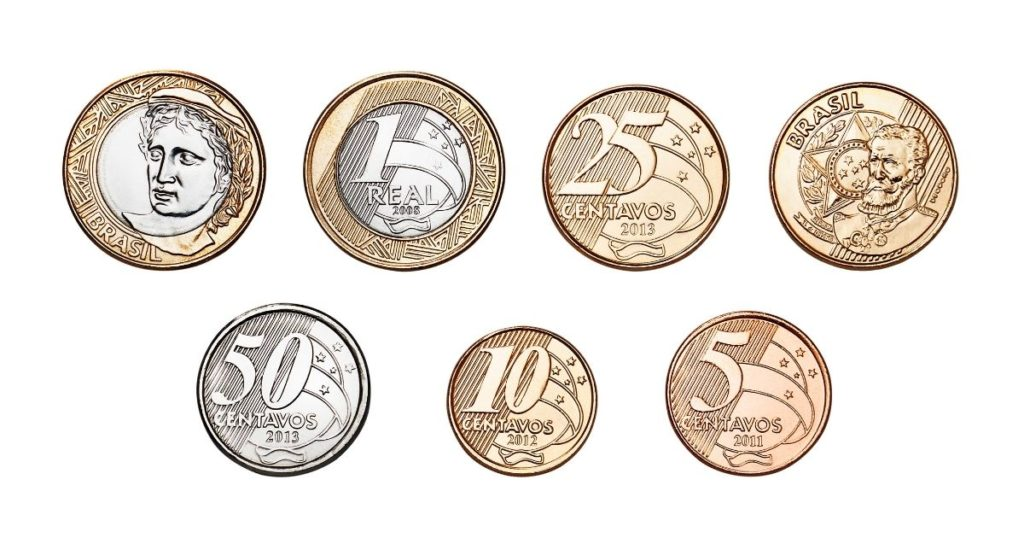

In [7]:
# Carrega uma foto com moedas
image = cv2.imread("brasil-moedas.jpg")

cv2_imshow(image)

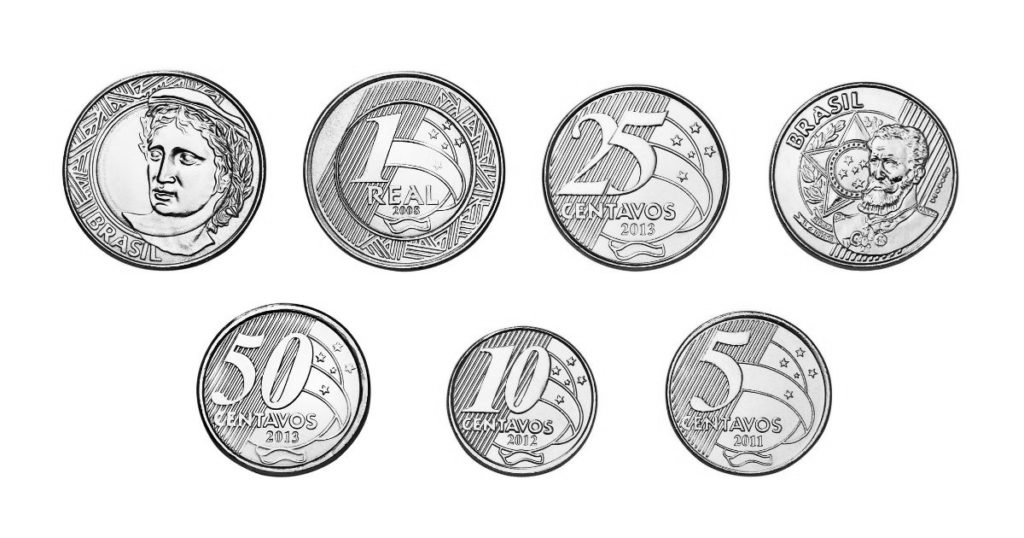

In [10]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

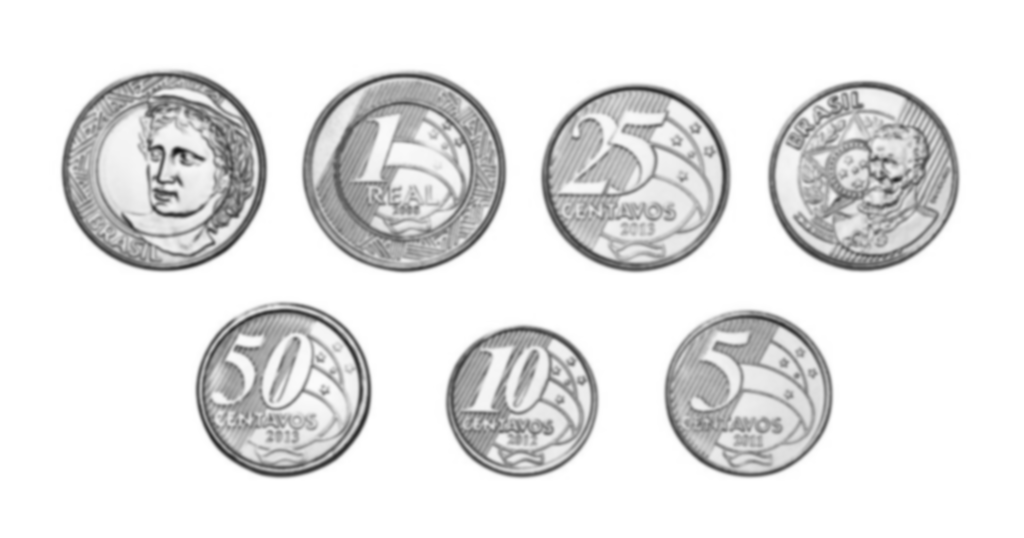

In [11]:
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
cv2_imshow(blurred)

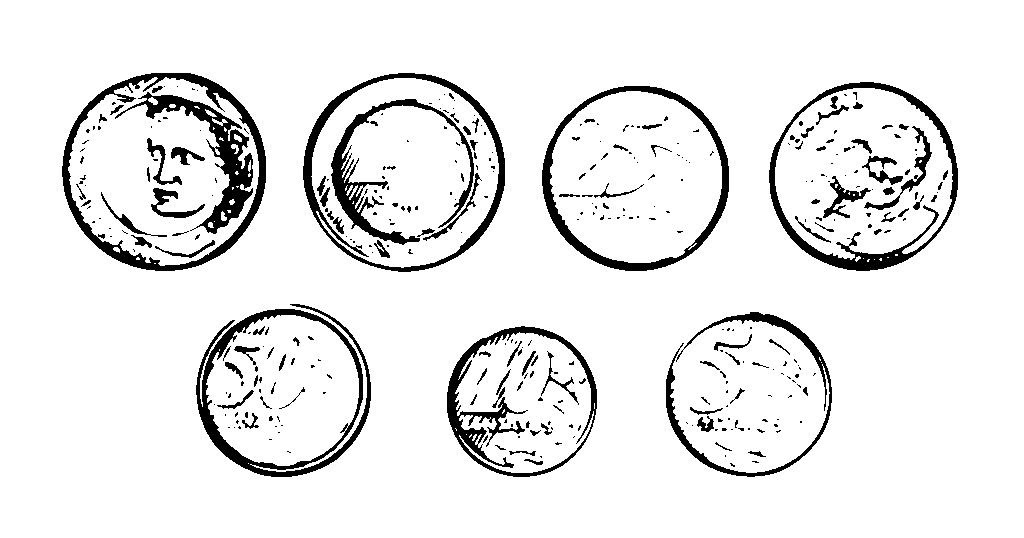

In [12]:
# Aplicando o thresholding
ret, thres = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)
cv2_imshow(thres)

## Thresholding Adaptativo

Na seção anterior, usamos um valor global como threshold. Mas isso pode não ser bom em todos os casos, por exemplo, se uma imagem tem diferentes condições de iluminação em diferentes áreas. Nesse caso, o thresholding adaptativo pode ajudar. Aqui, o algoritmo determina o threshold para um pixel com base em uma pequena região ao seu redor. Assim, obtemos diferentes thresholds para diferentes regiões da mesma imagem, o que proporciona melhores resultados para imagens com iluminação variável.

Além dos parâmetros descritos acima, o método cv.adaptiveThreshold recebe três parâmetros de entrada:

O adaptiveMethod decide como o valor do threshold é calculado:

- cv.ADAPTIVE_THRESH_MEAN_C: O valor do threshold é a média da área de vizinhança menos a constante C.
- cv.ADAPTIVE_THRESH_GAUSSIAN_C: O valor do threshold é a soma ponderada gaussiana dos valores da vizinhança menos a constante C.

O blockSize determina o tamanho da área de vizinhança e C é uma constante que é subtraída da média ou soma ponderada dos pixels da vizinhança.

O código abaixo compara o thresholding global e o thresholding adaptativo para uma imagem com iluminação variável:

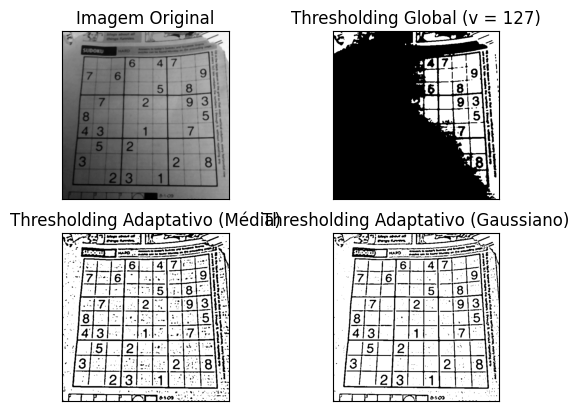

In [13]:
# Leitura da imagem em escala de cinza
img = cv2.imread('sudoku.png', cv2.IMREAD_GRAYSCALE)

# Aplicação de um filtro de mediana com kernel de tamanho 5 para redução de ruído
img = cv2.medianBlur(img, 5)

# Aplicação do thresholding global com valor de threshold igual a 127
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Aplicação do thresholding adaptativo usando a média da área de vizinhança
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Aplicação do thresholding adaptativo usando uma soma ponderada gaussiana da área de vizinhança
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Títulos para cada imagem
titles = ['Imagem Original', 'Thresholding Global (v = 127)', 'Thresholding Adaptativo (Média)', 'Thresholding Adaptativo (Gaussiano)']

# Lista com as imagens processadas
images = [img, th1, th2, th3]

# Criação das subplots para mostrar as imagens
for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

# Exibição das imagens
plt.show()